# CNN en visión compleja
Este notebook compara dos redes convolucionales aplicadas a conjuntos de imágenes más complejas que MNIST:

- **CIFAR-10**: 10 clases generales de objetos cotidianos.
- **Traffic Sign (GTSRB)**: clasificación de señales de tráfico.

El objetivo es mostrar cómo las CNN pueden escalar a problemas reales más exigentes.

## 1. CNN en CIFAR-10

In [1]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

(X_train_cifar, y_train_cifar), (X_test_cifar, y_test_cifar) = cifar10.load_data()
X_train_cifar, X_test_cifar = X_train_cifar / 255.0, X_test_cifar / 255.0
y_train_cifar = to_categorical(y_train_cifar, 10)
y_test_cifar = to_categorical(y_test_cifar, 10)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [2]:
model_cifar = Sequential([
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [3]:
model_cifar.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_cifar = model_cifar.fit(X_train_cifar, y_train_cifar, epochs=10, validation_data=(X_test_cifar, y_test_cifar), verbose=0)

## 2. CNN en señales de tráfico (GTSRB)

In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("meowmeowmeowmeowmeow/gtsrb-german-traffic-sign")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/gtsrb-german-traffic-sign


In [10]:
import os
import shutil
import pandas as pd

# 1) Lee el CSV
df = pd.read_csv("/kaggle/input/gtsrb-german-traffic-sign/Test.csv", usecols=["Path","ClassId"])

# 2) Define rutas
src_base = "/kaggle/input/gtsrb-german-traffic-sign/Test"
work_base = "/kaggle/working/gtsrb_test"  # aquí podrás escribir

# 3) Copia todos los ficheros a tu carpeta de trabajo
os.makedirs(work_base, exist_ok=True)
for path in df["Path"]:
    fname = os.path.basename(path)  # "Test/00000.png" → "00000.png"
    shutil.copy(os.path.join(src_base, fname),
                os.path.join(work_base, fname))

# 4) Reorganízalos dentro de /kaggle/working/gtsrb_test/0 … /42
for path, cls in zip(df["Path"], df["ClassId"]):
    fname = os.path.basename(path)
    src   = os.path.join(work_base, fname)
    dst_dir = os.path.join(work_base, str(cls))
    os.makedirs(dst_dir, exist_ok=True)
    shutil.move(src, os.path.join(dst_dir, fname))

# 5) Ahora Keras ya puede leerlos
from tensorflow.keras.preprocessing import image_dataset_from_directory
test_ds = image_dataset_from_directory(
    work_base,
    labels="inferred",
    label_mode="int",
    image_size=(32,32),
    batch_size=128
)


Found 12630 files belonging to 43 classes.


In [12]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

# DATASETS
train_ds = image_dataset_from_directory(
    "/kaggle/input/gtsrb-german-traffic-sign/Train",   # tu carpeta Train original
    labels="inferred",
    label_mode="int",
    image_size=(32,32),
    batch_size=128,
    shuffle=True
)

test_ds = image_dataset_from_directory(
    "/kaggle/working/gtsrb_test",
    labels="inferred",
    label_mode="int",
    image_size=(32,32),
    batch_size=128,
    shuffle=False
)

# MODELO
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, 3, activation="relu"),
    MaxPooling2D(),
    Conv2D(64, 3, activation="relu"),
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(43, activation="softmax"),
])

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

# TRAIN
history = model.fit(
    train_ds,
    epochs=10,
    validation_data=test_ds
)


Found 39209 files belonging to 43 classes.
Found 12630 files belonging to 43 classes.
Epoch 1/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 97s 306ms/step - accuracy: 0.0614 - loss: 7.0848 - val_accuracy: 0.2128 - val_loss: 3.0027
Epoch 2/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 65s 61ms/step - accuracy: 0.1392 - loss: 3.1335 - val_accuracy: 0.2989 - val_loss: 2.3654
Epoch 3/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 18s 59ms/step - accuracy: 0.1966 - loss: 2.7572 - val_accuracy: 0.4294 - val_loss: 1.8453
Epoch 4/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 19s 62ms/step - accuracy: 0.2705 - loss: 2.4451 - val_accuracy: 0.5065 - val_loss: 1.6035
Epoch 5/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 23s 71ms/step - accuracy: 0.3477 - loss: 2.1856 - val_accuracy: 0.6041 - val_loss: 1.3116
Epoch 6/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 19s 63ms/step - accuracy: 0.4616 - loss: 1.7836 - val_accuracy: 0.7520 - val_loss: 0.8407
Epoch 7/10
307/307 ━━━━━━━━━━━━━━━━━━━━ 19s 62ms/step - accuracy: 0.6214 - loss: 1.1941 - val_accuracy: 0.8553 - val_loss: 0.5203
Epo

## 3. Comparación visual de resultados

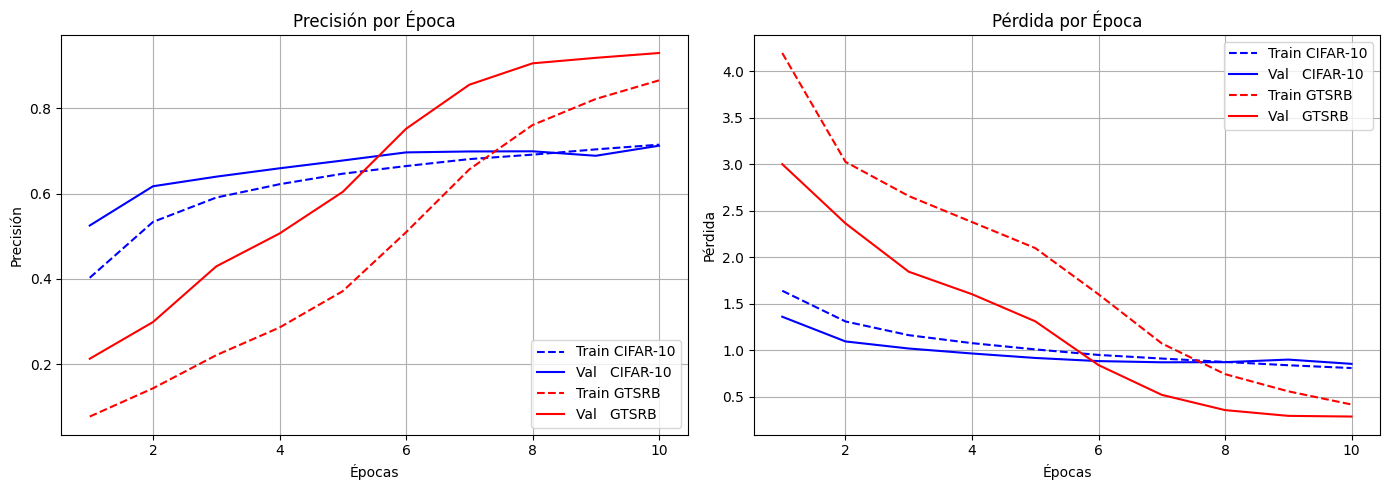

In [15]:
import matplotlib.pyplot as plt

# extraemos los historiales
acc_cifar = history_cifar.history['accuracy']
val_acc_cifar = history_cifar.history['val_accuracy']
loss_cifar = history_cifar.history['loss']
val_loss_cifar = history_cifar.history['val_loss']

acc_gtsrb = history.history['accuracy']
val_acc_gtsrb = history.history['val_accuracy']
loss_gtsrb = history.history['loss']
val_loss_gtsrb = history.history['val_loss']

epochs = range(1, len(acc_cifar) + 1)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# subplot 1: precisión
axes[0].plot(epochs, acc_cifar,   'b--', label='Train CIFAR-10')
axes[0].plot(epochs, val_acc_cifar, 'b-',  label='Val   CIFAR-10')
axes[0].plot(epochs, acc_gtsrb,   'r--', label='Train GTSRB')
axes[0].plot(epochs, val_acc_gtsrb, 'r-',  label='Val   GTSRB')
axes[0].set_title('Precisión por Época')
axes[0].set_xlabel('Épocas')
axes[0].set_ylabel('Precisión')
axes[0].legend(loc='lower right')
axes[0].grid(True)

# subplot 2: pérdida
axes[1].plot(epochs, loss_cifar,   'b--', label='Train CIFAR-10')
axes[1].plot(epochs, val_loss_cifar, 'b-',  label='Val   CIFAR-10')
axes[1].plot(epochs, loss_gtsrb,   'r--', label='Train GTSRB')
axes[1].plot(epochs, val_loss_gtsrb, 'r-',  label='Val   GTSRB')
axes[1].set_title('Pérdida por Época')
axes[1].set_xlabel('Épocas')
axes[1].set_ylabel('Pérdida')
axes[1].legend(loc='upper right')
axes[1].grid(True)

plt.tight_layout()
plt.show()
